In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Loading and understanding

In [2]:
lending_master_df = pd.read_csv('loan.csv')

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
lending_master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 30.0+ MB


In [4]:
lending_master_df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
lending_master_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [6]:
#No. of columns with all NAN values
temp = lending_master_df.isna().all()
len(temp[temp==True])

54

#### Data cleaning

In [7]:
#Removing columns with All NAN values 
loanData = lending_master_df.dropna(axis=1,how='all')
loanData.shape

(39717, 57)

In [8]:
#Find columns with partially empty values
round(loanData.isna().sum()/lending_master_df.shape[0]*100,2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [9]:
# Remove irrelevant column 'url' as it is not adding any additionl information
loanData = loanData.drop(columns='url')
loanData.shape

(39717, 56)

In [10]:
# Drop columns as all the values are 0 in these columns
loanData = loanData.drop(columns=['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','policy_code','collections_12_mths_ex_med'],axis=1)
loanData.shape

(39717, 50)

In [11]:
# Drop columns as 'title' is similar to 'purpose' and 'zip_code' is incomplete (has values with _xxx)
loanData = loanData.drop(['title', 'zip_code'], axis=1)
loanData.shape

(39717, 48)

In [12]:
loanData_copy = loanData
loanData.to_csv('loanData_afterColDrop.csv')

In [13]:
#######loanData = pd.read_csv('loanData_afterColDrop.csv')

In [14]:
# Remove % from 'int_rate'
loanData['int_rate'] = loanData['int_rate'].str.rstrip('%').astype('float')

In [15]:
# Strip off 'months' from term columns
loanData['term'] =loanData['term'].apply(lambda x: str(x).replace('months','').strip())

In [16]:
# Strip off % from'revol_util' column
loanData['revol_util'] = loanData['revol_util'].str.rstrip('%').astype('float')

In [17]:
# Create a dictionary with categories - 0, 1-9, 10 and categorize emp_length.

emp_len_dict = {k:'1-9' for k in loanData['emp_length'].unique()}
emp_len_dict['10+ years'] = 10
emp_len_dict['< 1 year'] = 0
emp_len_dict['n/a'] = 'n/a'
#emp_len_dict['nan']
print(emp_len_dict)

{'10+ years': 10, '< 1 year': 0, '1 year': '1-9', '3 years': '1-9', '8 years': '1-9', '9 years': '1-9', '4 years': '1-9', '5 years': '1-9', '6 years': '1-9', '2 years': '1-9', '7 years': '1-9', nan: '1-9', 'n/a': 'n/a'}


In [18]:
# Replace NAN values with 'n/a' for 'emp_length'  column
loanData['emp_length'] = loanData['emp_length'].fillna('n/a',inplace=True)

In [19]:
# Create a new column 'emp_length_range' that will contain the categories - 0, 1-9 ,10
loanData['emp_length_range']= loanData['emp_length'].map(emp_len_dict)
loanData.shape

(39717, 49)

In [20]:
loanData_copy1 = loanData
loanData.to_csv('loanData_afterDataCleaning.csv')


In [21]:
# Filteronly the 'Charged-off' cases
loanData_charged_off = loanData.loc[loanData['loan_status']=='Charged Off']

In [22]:
loanData_charged_off.to_csv('loanData_chargedOffCases.csv')

In [23]:
loanData_charged_off.shape

(5627, 49)

In [24]:
loanData_charged_off.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
id,1.000000,0.994192,0.153415,0.167022,0.310973,0.196032,0.083107,-0.011801,0.111235,0.002086,...,NaN,0.130110,0.221536,0.054958,0.208318,-0.093661,0.065405,-0.050719,0.025868,-0.026409
member_id,0.994192,1.000000,0.148485,0.161690,0.319364,0.197176,0.071906,-0.013352,0.111183,0.002918,...,NaN,0.127992,0.227669,0.052423,0.208931,-0.096233,0.062211,-0.054522,0.021893,-0.022869
loan_amnt,0.153415,0.148485,1.000000,0.979134,0.907129,0.351216,0.925911,0.352359,0.063872,-0.029843,...,NaN,0.680814,0.643174,0.551302,0.699167,0.087517,0.310185,0.157602,0.332981,-0.028286
funded_amnt,0.167022,0.161690,0.979134,1.000000,0.926996,0.353906,0.953826,0.347131,0.060861,-0.027366,...,NaN,0.698496,0.660695,0.569719,0.712395,0.094089,0.316077,0.164236,0.338804,-0.033212
funded_amnt_inv,0.310973,0.319364,0.907129,0.926996,1.000000,0.369863,0.858041,0.314505,0.072924,-0.031524,...,NaN,0.685354,0.726049,0.550112,0.718712,0.067972,0.301537,0.138645,0.291813,-0.036099
int_rate,0.196032,0.197176,0.351216,0.353906,0.369863,1.000000,0.327909,0.132252,0.040607,0.119643,...,NaN,0.264457,0.277016,0.070138,0.468654,0.055287,0.159769,0.072141,0.093077,0.074839
installment,0.083107,0.071906,0.925911,0.953826,0.858041,0.327909,1.000000,0.358656,0.042358,-0.012530,...,NaN,0.666864,0.616589,0.577424,0.628887,0.119871,0.300368,0.185040,0.350428,-0.025611
annual_inc,-0.011801,-0.013352,0.352359,0.347131,0.314505,0.132252,0.358656,1.000000,-0.089725,0.021765,...,NaN,0.279975,0.262635,0.239091,0.263186,0.062817,0.134942,0.087584,0.130603,-0.004122
dti,0.111235,0.111183,0.063872,0.060861,0.072924,0.040607,0.042358,-0.089725,1.000000,-0.068839,...,NaN,0.043360,0.049070,0.014944,0.068741,-0.037967,0.030623,0.006795,0.000367,0.018904
delinq_2yrs,0.002086,0.002918,-0.029843,-0.027366,-0.031524,0.119643,-0.012530,0.021765,-0.068839,1.000000,...,NaN,-0.016056,-0.022492,-0.034993,0.002871,0.029122,0.014393,0.024517,-0.000316,0.002453


In [25]:
# Dropping columns out_prncp and out_prncp_inv as all the values are 0
loanData_charged_off = loanData_charged_off.drop(columns=['out_prncp','out_prncp_inv'])
# Dropping column id as it is not providing extra info
loanData_charged_off = loanData_charged_off.drop(columns=['id'])

In [26]:
#####loanData_ch_not_nulls = loanData_charged_off.drop(columns=['emp_title','emp_length','desc','mths_since_last_delinq','mths_since_last_record','revol_util','last_pymnt_d','next_pymnt_d','last_credit_pull_d','pub_rec_bankruptcies'])

In [27]:
loanData_charged_off.shape

(5627, 46)

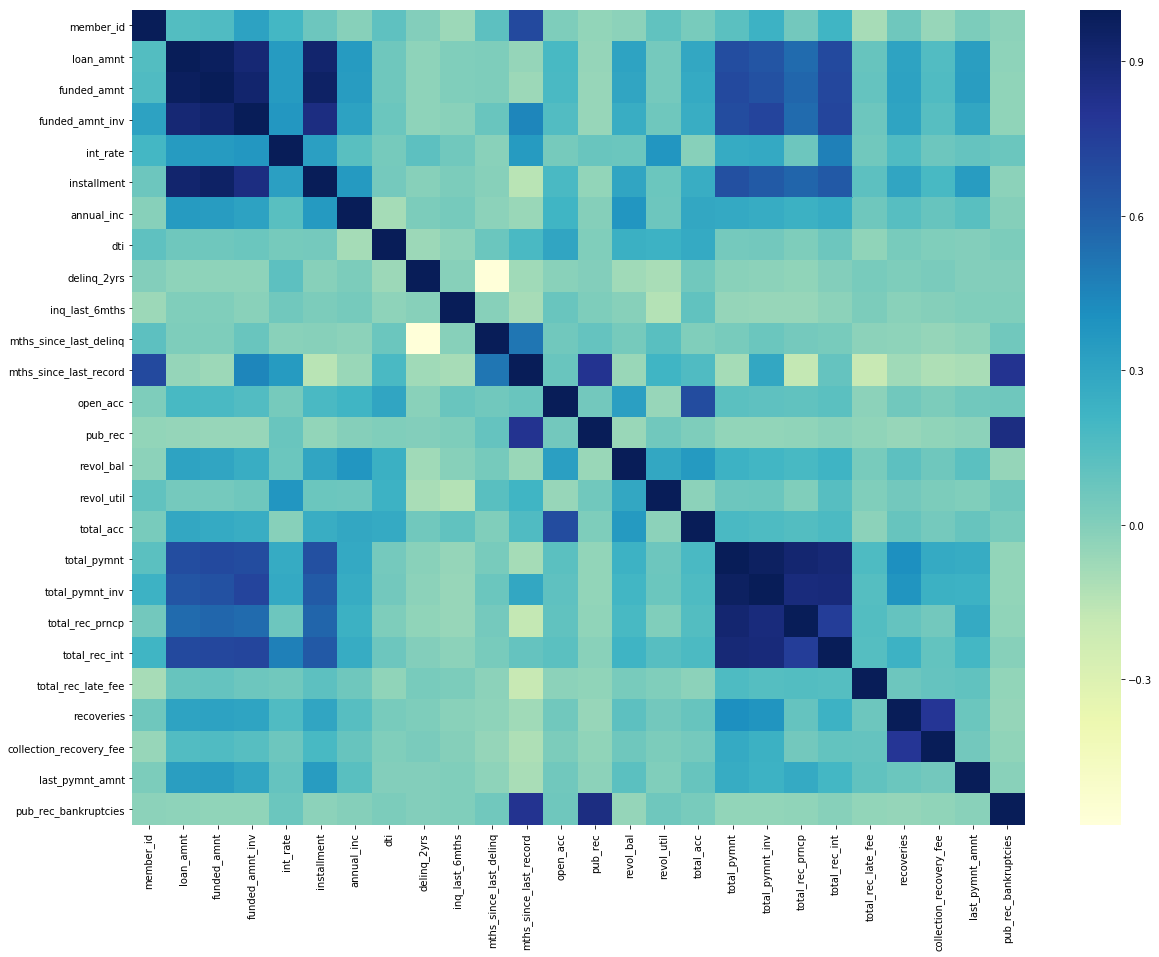

In [28]:
plt.figure(figsize=(20,15))
sns.heatmap(data=loanData_charged_off.corr(),annot=False, cmap="YlGnBu",fmt='g')

In [29]:
lending_master_df_memberids = lending_master_df['member_id']
lending_master_df[lending_master_df_memberids.isin(lending_master_df_memberids[lending_master_df_memberids.duplicated()])]
#lending_master_df_memberids.duplicated()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
